# Movie Data Analysis

## Importing Essential libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

## Data Import

In [2]:
df = pd.read_csv('E:\Projects\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning
##### Looking for missing data

In [3]:
for column in df.columns:
    percent_missing = np.mean(df[column].isnull())
    print('{} - {}%'.format(column, percent_missing))
original_lenght = len(df.index)

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


Result show each column with the percentage of missing data. These rows are dropped for simplicity.

In [4]:
data = df.copy(deep = True)
data = data.dropna()
new_lenght = len(data.index)
print(f"A total of {original_lenght-new_lenght} rows was dropped, equating to {round((new_lenght/original_lenght)*100, 2)}%.")

A total of 2247 rows was dropped, equating to 70.7%.


##### Looking into column datatypes

In [5]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Changing from float64 to int64 for budget, gross and votes.

In [6]:
data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')
data['votes'] = data['votes'].astype('int64')

##### Handling inconsistency of the received column and released column not being equal to the year column. 
Function that takes a string and looks for 4 consecutive ints, return this as year.

In [7]:
def year_finder(content):
    year = ''
    for char in content:
        try:
            int(char)
            year = year + str(char)
        except:
            year = ''
        if len(year) == 4:
            return year

Output shows that the 'yearscorrect' column only contains actual years and no artifacts. 

In [8]:
data['yearscorrect'] = data['released'].apply(lambda row: year_finder(row))
print(f"Unique values of the yearscorrect column \n{data['yearscorrect'].unique()}")

Unique values of the yearscorrect column 
['1980' '1981' '1984' '1983' '1982' '1987' '1985' '1986' '1990' '1988'
 '1992' '1989' '1991' '1999' '1994' '1993' '1995' '2001' '1996' '2000'
 '1997' '1998' '2002' '2003' '2004' '2019' '2014' '2005' '2006' '2007'
 '2008' '2010' '2009' '2013' '2011' '2016' '2015' '2012' '2017' '2018'
 '2020']


##### Checks for duplicate entries.

In [9]:
data = data.drop_duplicates()
print(f"A total of {new_lenght-len(data)} duplicate entries have been found and dropped.")

A total of 0 duplicate entries have been found and dropped.


## Analysis of Gross Revenue

Initial predictions
- Budget - high correlation
- Company - high to moderate correlation

#### First look at the budget and gross earnings data.
Plots of budget vs gross earnings shows a definite trend, with the gross earnings increasing with higher film budget.

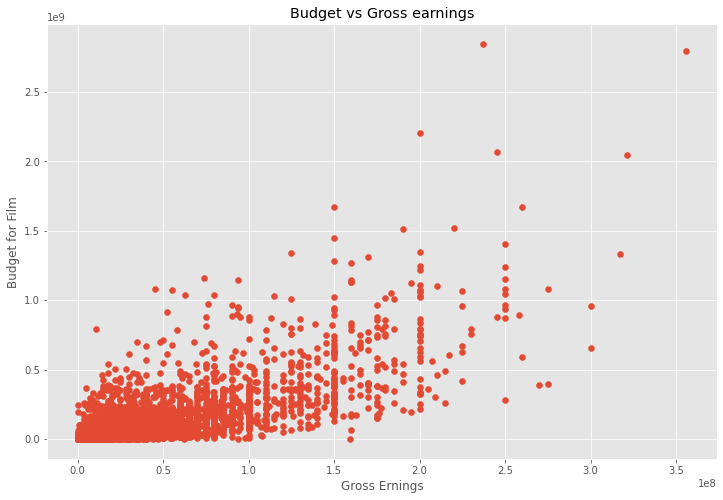

In [10]:
plt.scatter(x=data['budget'], y=data['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Gross Ernings')
plt.ylabel('Budget for Film');

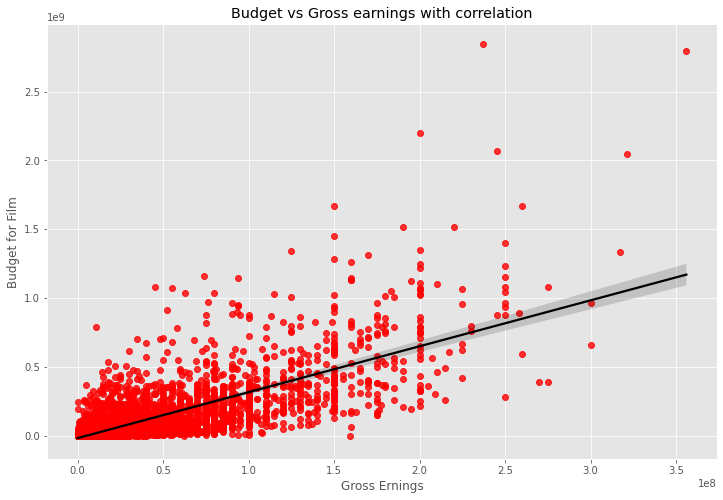

In [11]:
fig = sns.regplot(x='budget', y='gross', data=data, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.title('Budget vs Gross earnings with correlation')
plt.xlabel('Gross Ernings')
plt.ylabel('Budget for Film');

#### Correlation of all numerical data.
The Pearson correlation matrix shows a significant correlation between budget and gross earnings. Good correlation between votes and gross earnings can also be seen.


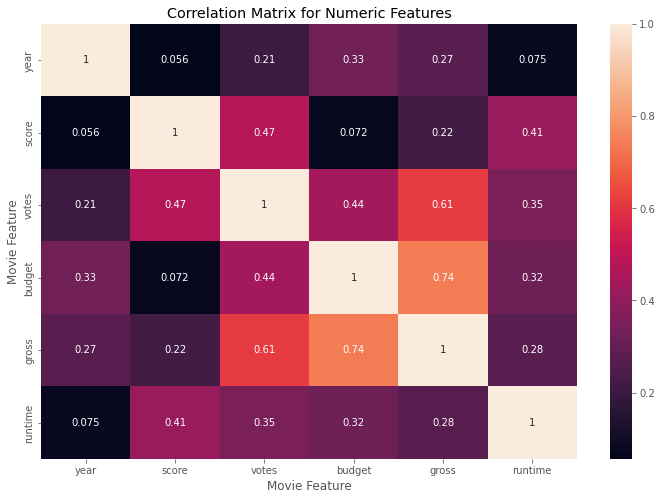

In [12]:
correlation_matix = data.corr(method = 'pearson')
sns.heatmap(correlation_matix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature');

#### Non numerical data
By numerizing the text data throu categories a Pearson correaltion matrix can be made.

In [13]:
data_numerized = data.copy(deep = True)
for column in data_numerized.columns:
    if (data_numerized[column].dtype == 'object'):
        data_numerized[column] = data_numerized[column].astype('category')
        data_numerized[column] = data_numerized[column].cat.codes
data_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearscorrect
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,0


In [14]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearscorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


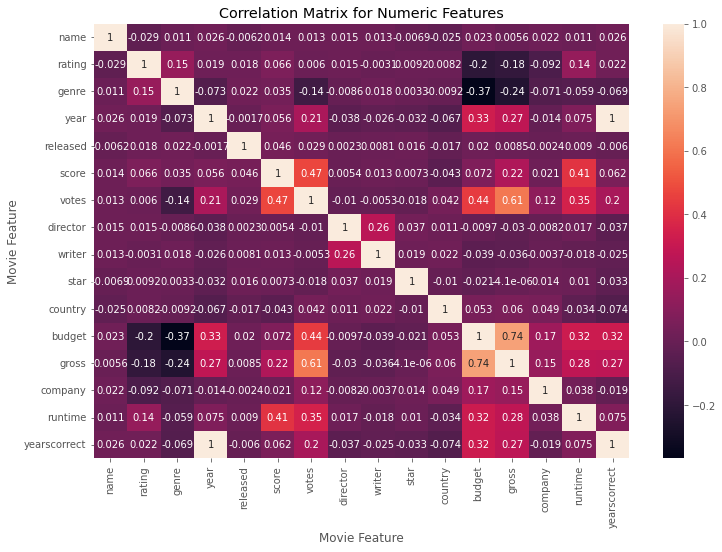

In [15]:
correlation_matix = data_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature');

In [16]:
correlation_mat = data_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()

high_correlation = sorted_pairs[(sorted_pairs) > 0.5][(sorted_pairs[(sorted_pairs) > 0.5]) < 0.99]
print(high_correlation)

gross   votes     0.614751
votes   gross     0.614751
gross   budget    0.740247
budget  gross     0.740247
dtype: float64


## Conclusion 
The results showed that company does not have a high correlation with gross earnings. However, both budget and votes do have a high correlation of 0.74 and 0.61 with the gross earnings of the movie respectively.